# Data Description

You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

* Data Dictionary

| Feature | Definition | Key |
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for soerrorbarrorbaro-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them.




# Importing Libraries

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring the Data

In [ ]:
path = '/content/titanic.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Unuseful Features : `PassengerId, Name and Ticket` >> To be dropped
* Categorical Features: `Sex, Pclass, SibSp, Parch and Embarked `
* Numerical Features : `Age and Fare`
* Target : `Survived`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Duplicate Values

In [ ]:
df.duplicated().sum()

0

>If there are any duplicates, we will drop them:

         df.drop_duplicates(inplace=True)

# Missing Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
round(df.isna().mean() * 100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

* Missing Values can be dropped or imputed.
* If Missing Values are less than 5% of the total data, we can drop ***Rows***.
* If Missing Values are more than 40% of the total data, we can drop ***Column***.
* Otherwise, we can impute them
        
        ( Not a rule of thumb, but a good practice)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['Embarked']  = imputer.fit_transform(df[['Age', 'Fare', 'Pclass']])

In [ ]:
round(df.isna().mean() * 100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.00
dtype: float64

<Axes: >

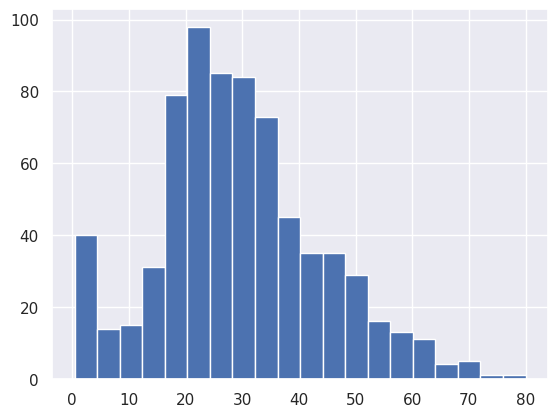

In [ ]:
df.Age.hist(bins=20)

In [ ]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-91-5affa973b9b3>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Drop Columns

In [ ]:
# Drop Unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename Columns

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
484,1,1,male,25.0,1,0,91.0792,25.0


# Univariate Analysis

In [ ]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
df.survived.value_counts() / len(df)   # shape[0]

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

        Suvival Rate : 38.38%

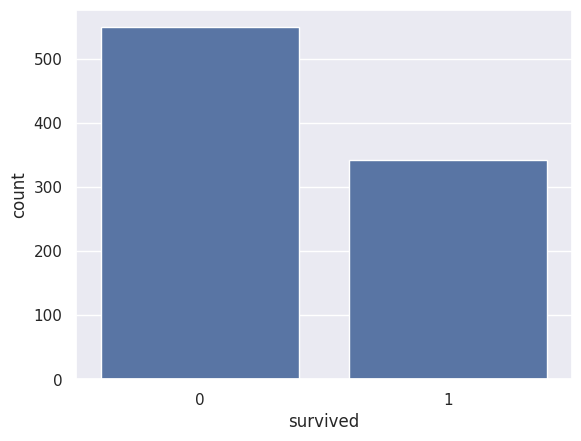

In [ ]:
sns.countplot(x='survived', data=df);

In [ ]:
df.pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

        More than 55% of the passengers were from 3rd class

In [ ]:
df.sibsp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64

        More than 68% of the passengers had no siblings or spouse

In [ ]:
def explore_categorical(df, col):
    print(f'### {col} ###')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

### pclass ###
3    0.552928
1    0.239865
2    0.207207
Name: pclass, dtype: float64


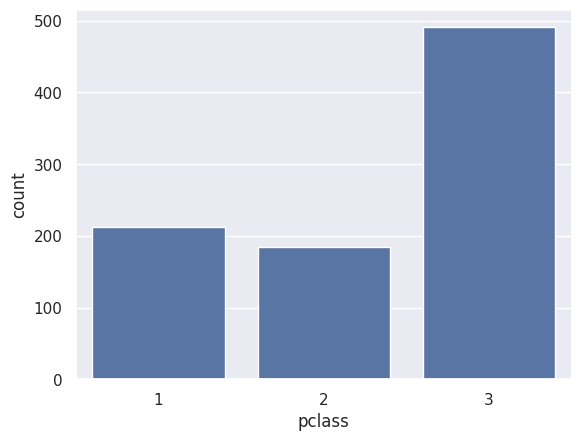

### sibsp ###
0    0.681306
1    0.235360
2    0.031532
4    0.020270
3    0.018018
8    0.007883
5    0.005631
Name: sibsp, dtype: float64


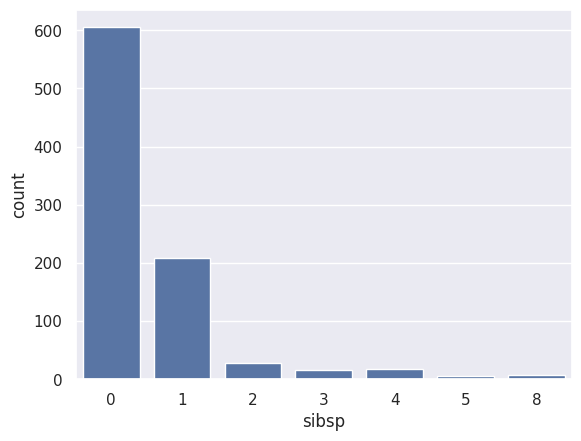

### parch ###
0    0.761261
1    0.131757
2    0.090090
5    0.005631
3    0.005631
4    0.004505
6    0.001126
Name: parch, dtype: float64


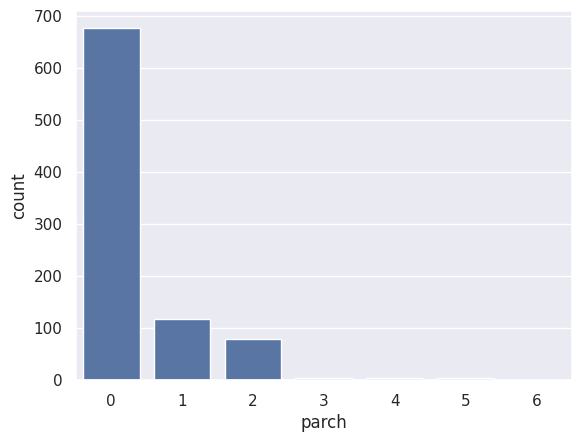

### embarked ###
28.00    0.046171
24.00    0.045045
30.00    0.036036
19.00    0.032658
22.00    0.031532
           ...   
49.50    0.001126
0.92     0.001126
20.50    0.001126
53.50    0.001126
74.00    0.001126
Name: embarked, Length: 114, dtype: float64


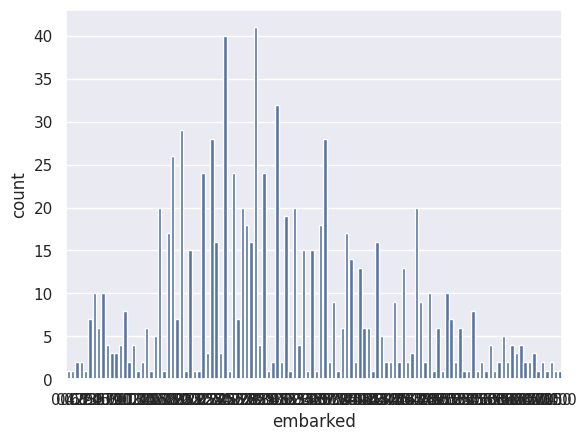

### sex ###
male      0.647523
female    0.352477
Name: sex, dtype: float64


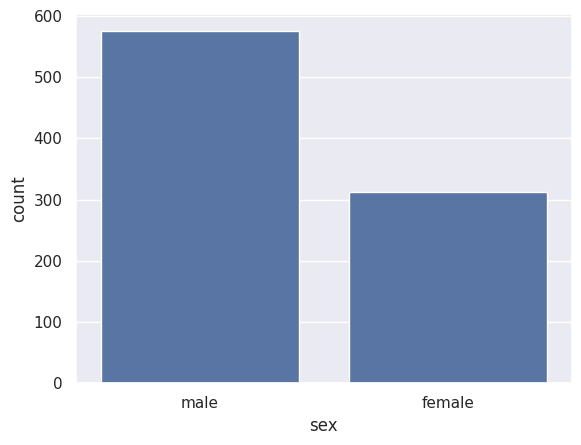

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    explore_categorical(df, col)

In [ ]:
def explore_continuous(df, col):
    print(f'### {col} ###')
    print(df[col].describe())
    sns.histplot(x=col, data=df);
    plt.show()

### age ###
count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


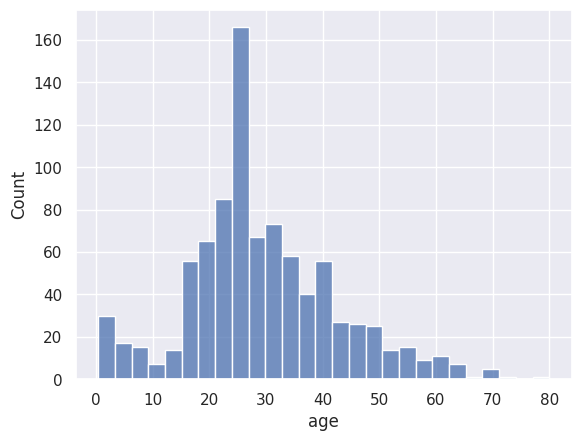

### fare ###
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


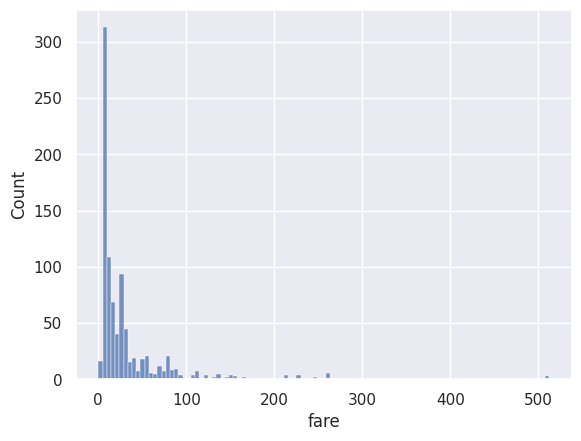

In [ ]:
for col in ['age', 'fare']:
    explore_continuous(df, col)


# Bivariate Analysis

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
236,0,2,male,44.0,1,0,26.0,44.0


In [ ]:
df.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

        The higher the class, the higher the survival rate

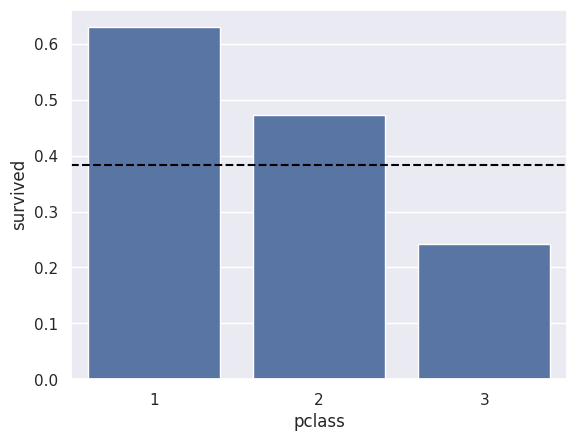

In [ ]:
# plot class vs survived
sns.barplot(x='pclass', y='survived', data=df, errorbar=None);
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='--');
plt.show();

In [ ]:
def survival_rate(df, col):
    print(df.groupby(col).survived.mean())
    sns.barplot(x=col, y='survived', data=df, errorbar=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


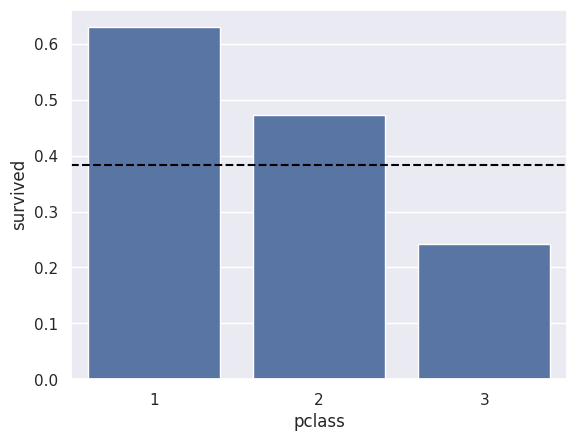

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


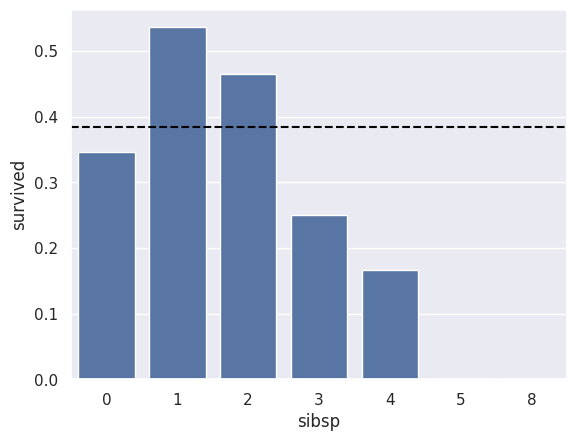

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


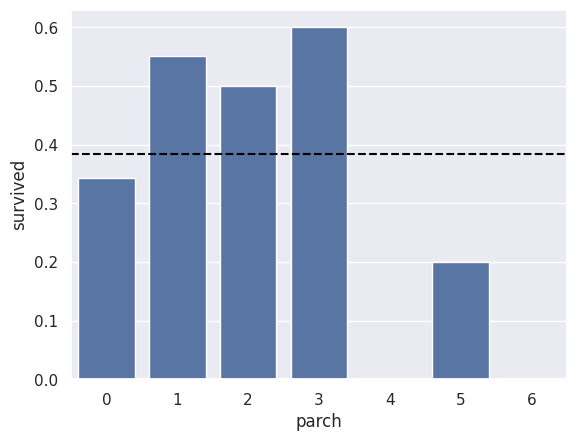

embarked
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 114, dtype: float64


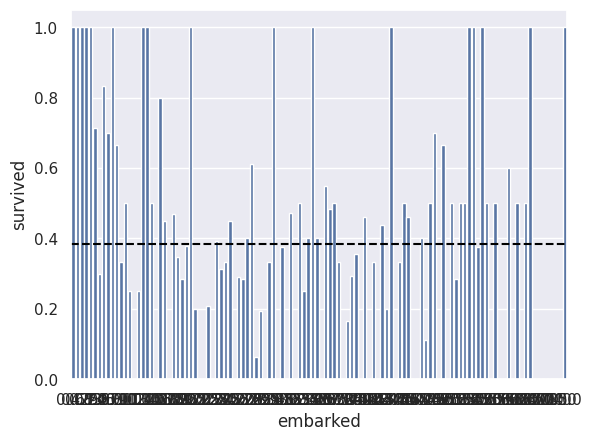

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


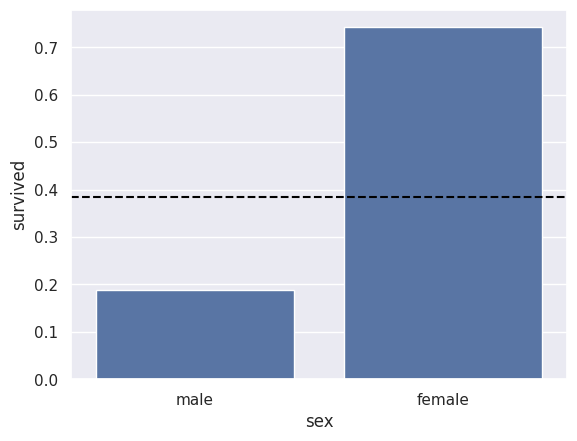

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    survival_rate(df, col)

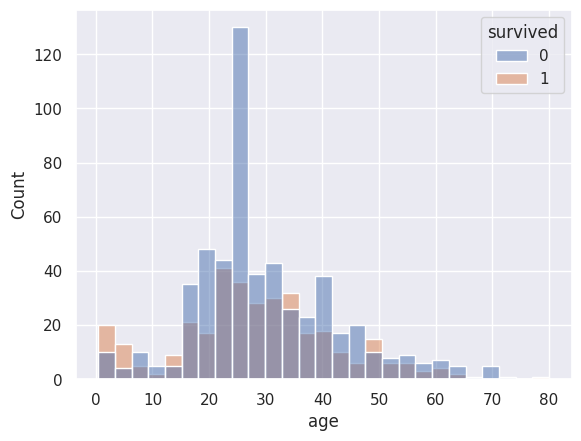

In [ ]:
sns.histplot(x='age', data=df, hue='survived');

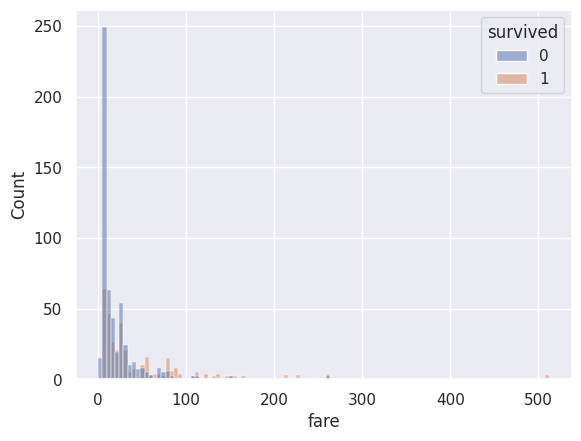

In [ ]:
sns.histplot(x='fare', data=df, hue='survived');

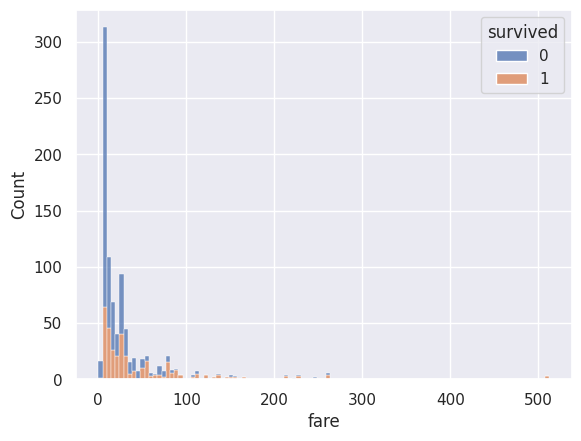

In [ ]:
sns.histplot(x='fare', data=df, hue='survived', multiple='stack');

In [ ]:
df_survived = df[df.survived == 1]
df_died = df[df.survived == 0]

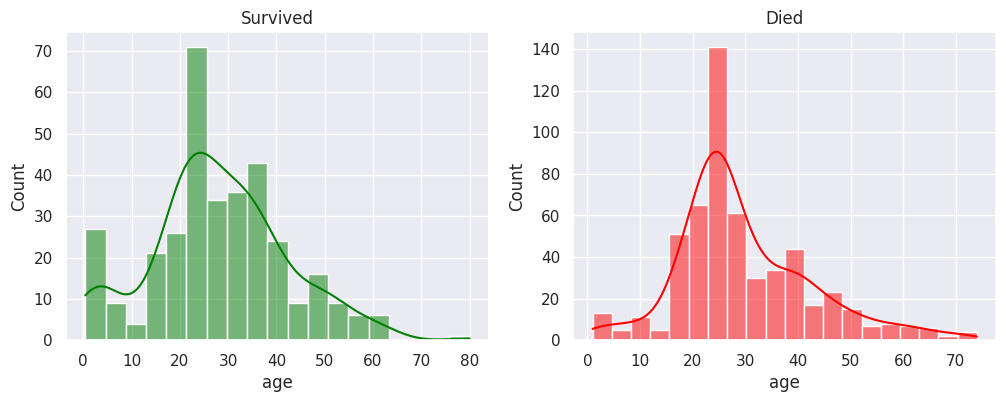

In [ ]:
# Subplots for age distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='age', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

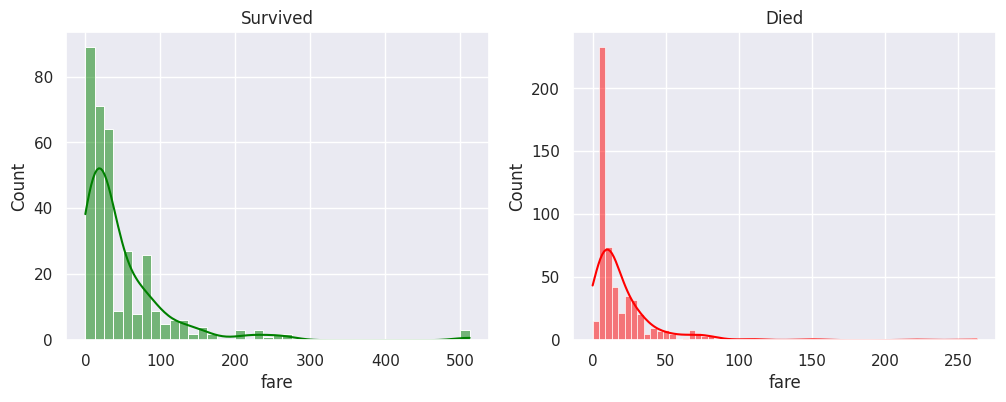

In [ ]:
# Subplots for fare distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='fare', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='fare', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

In [ ]:
df.describe()[['age', 'fare']]

,age,fare
count,891.000000,891.000000
mean,29.112424,32.204208
std,13.304424,49.693429
min,0.420000,0.000000
25%,21.500000,7.910400
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


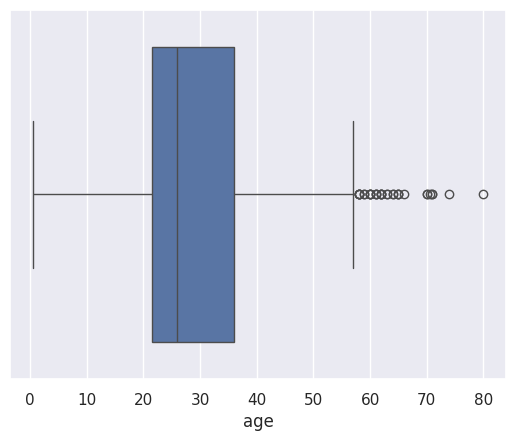

In [ ]:
sns.boxplot( x='age', data=df);

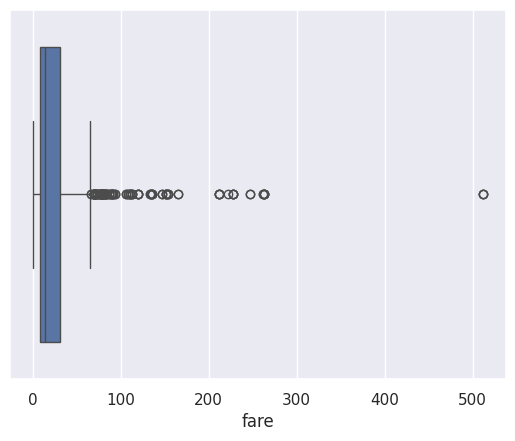

In [ ]:
sns.boxplot( x='fare', data=df);

            Many outliers in the fare
* We can use the IQR method to remove them.
* We can also choose a limit according to the distribution of the data.


# Outliers Detection

In [ ]:
df = df[df.fare < 300]

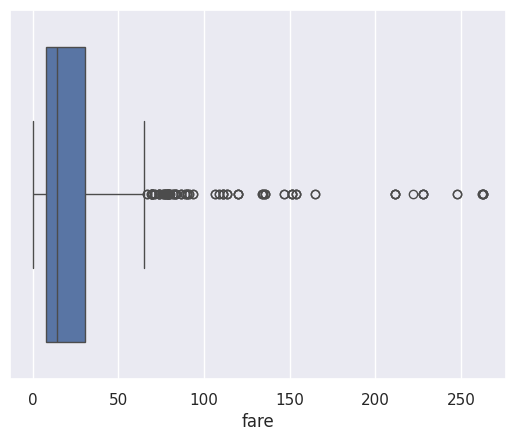

In [ ]:
sns.boxplot( x='fare', data=df);

In [ ]:
df.fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: fare, dtype: float64

In [ ]:
# Split Age into groups
df['age_group'] = pd.cut(df.age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

age_group
child     0.450549
young     0.260000
adult     0.427184
senior    0.363636
Name: survived, dtype: float64


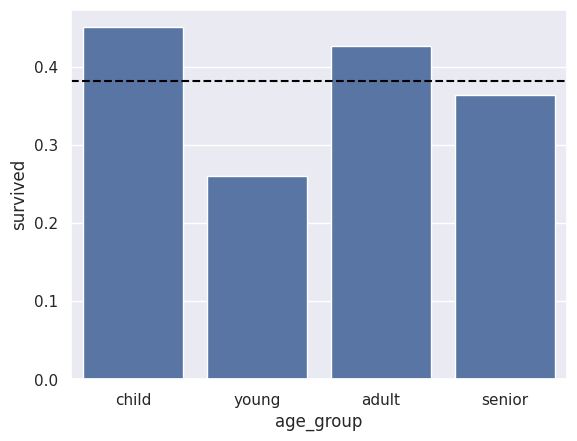

fare_group
low          0.215768
medium       0.285714
high         0.446809
very high    0.615385
Name: survived, dtype: float64


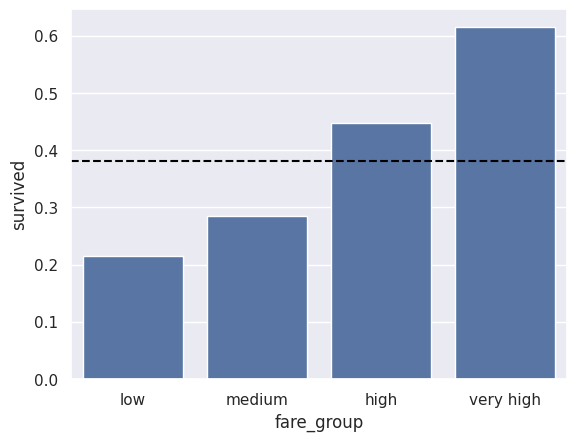

In [ ]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

# Multivariate Analysis

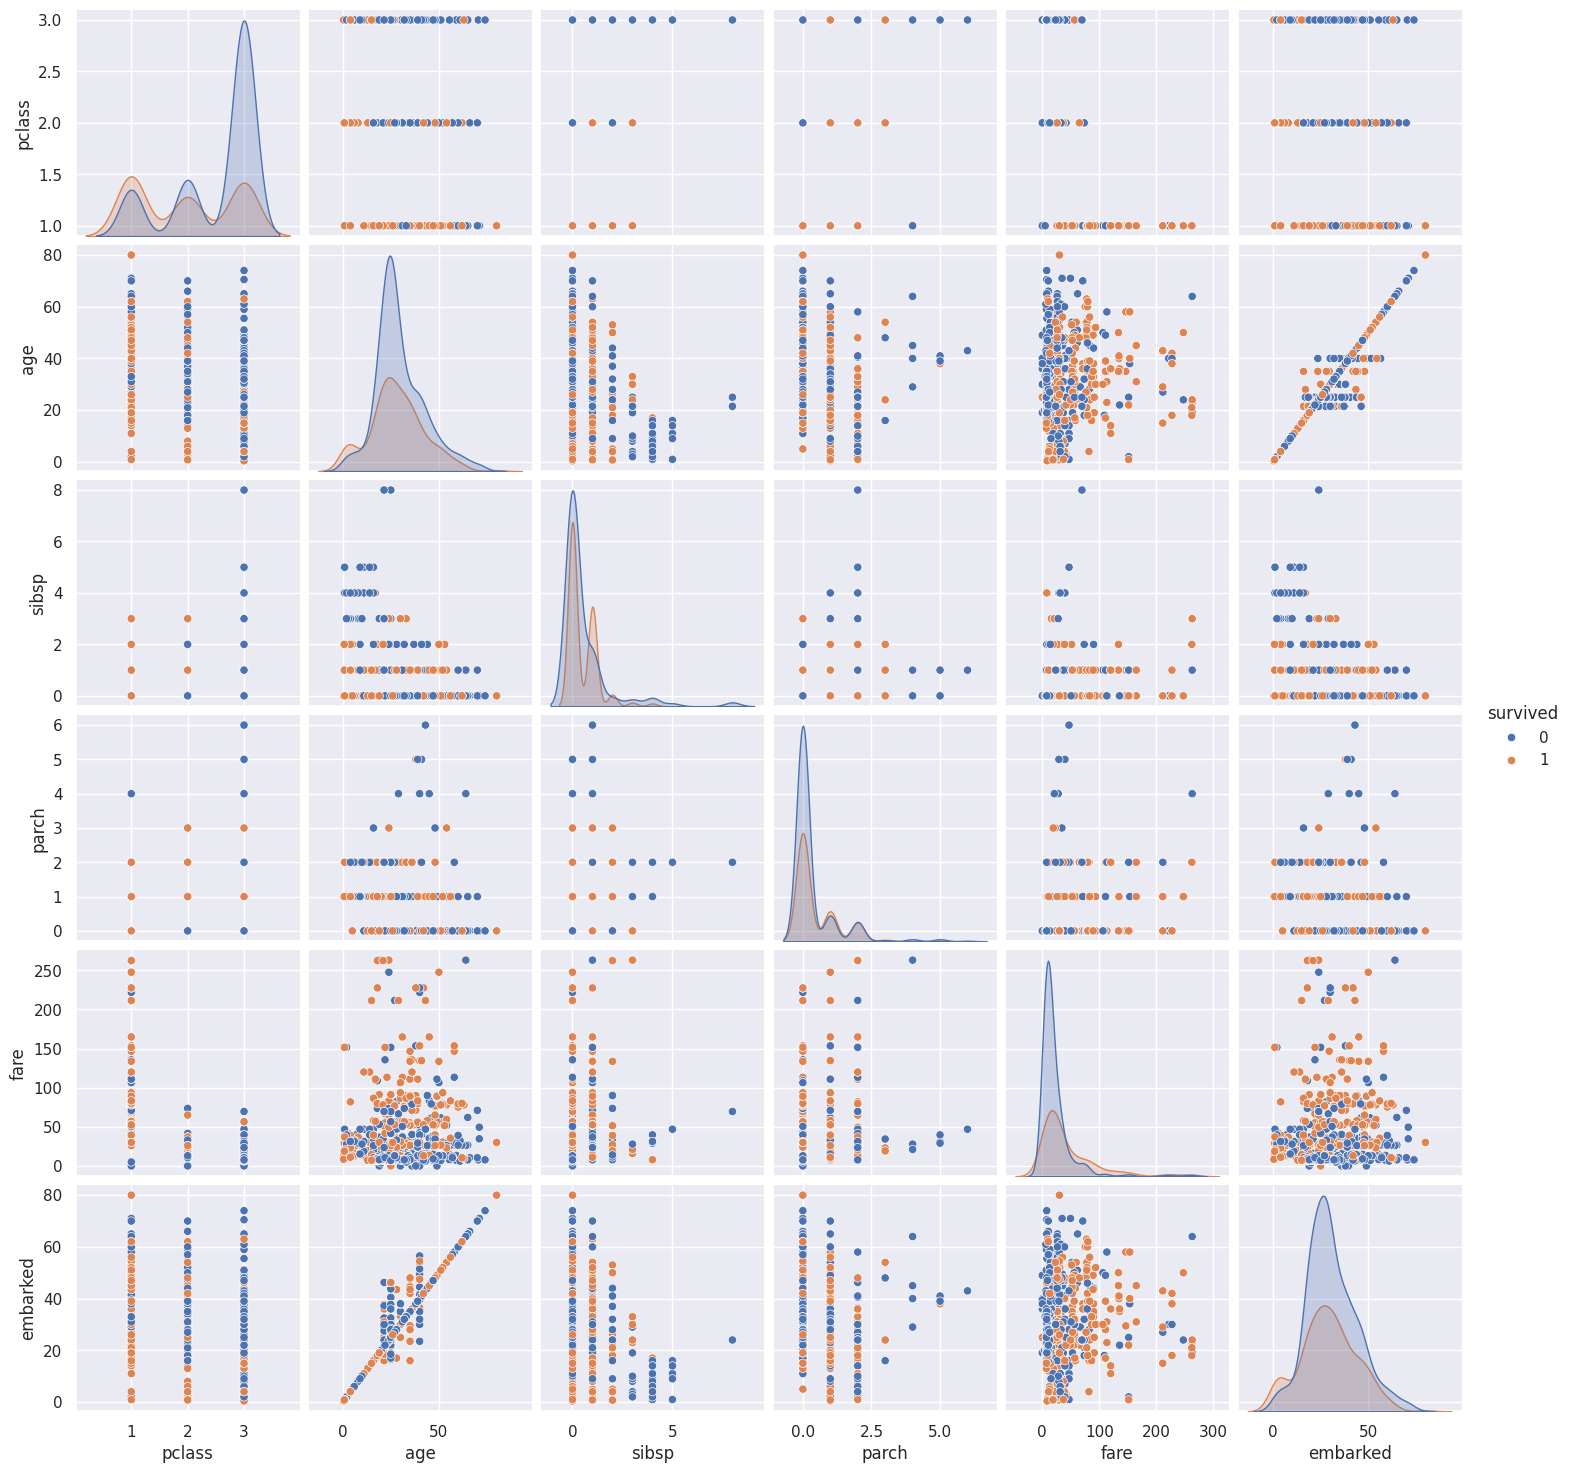

In [ ]:
sns.pairplot(df, hue='survived');

In [ ]:
df.corr()

<ipython-input-127-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,embarked
survived,1.000000,-0.334068,-0.061773,-0.033395,0.082157,0.261742,-0.066964
pclass,-0.334068,1.000000,-0.412975,0.080937,0.018212,-0.604960,-0.348189
age,-0.061773,-0.412975,1.000000,-0.249291,-0.175669,0.129898,0.940461
sibsp,-0.033395,0.080937,-0.249291,1.000000,0.415141,0.211816,-0.263158
parch,0.082157,0.018212,-0.175669,0.415141,1.000000,0.263910,-0.202880
fare,0.261742,-0.604960,0.129898,0.211816,0.263910,1.000000,0.076993
embarked,-0.066964,-0.348189,0.940461,-0.263158,-0.202880,0.076993,1.000000


In [ ]:
df.corr()['survived']

<ipython-input-128-d3a87174f54c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['survived']


survived    1.000000
pclass     -0.334068
age        -0.061773
sibsp      -0.033395
parch       0.082157
fare        0.261742
embarked   -0.066964
Name: survived, dtype: float64

<ipython-input-129-e02a37b9e4d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


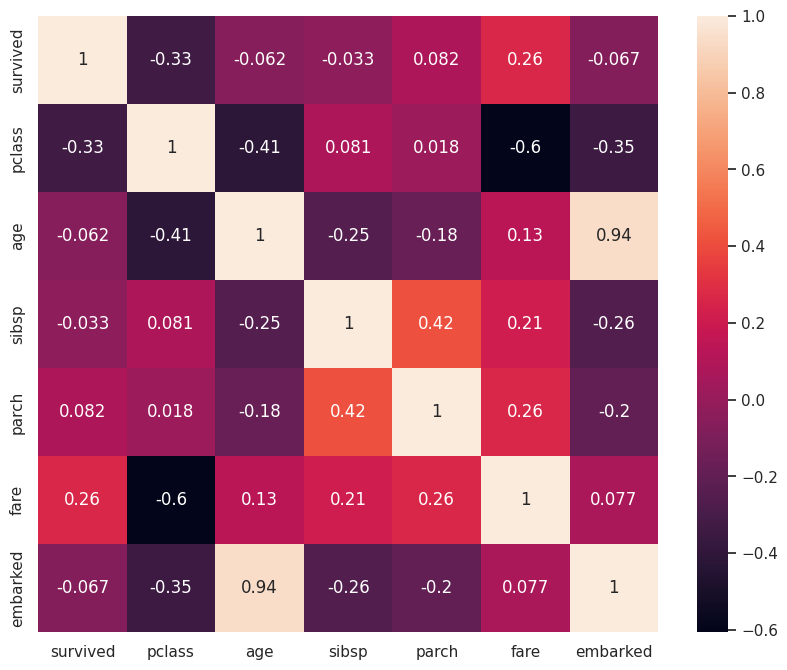

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

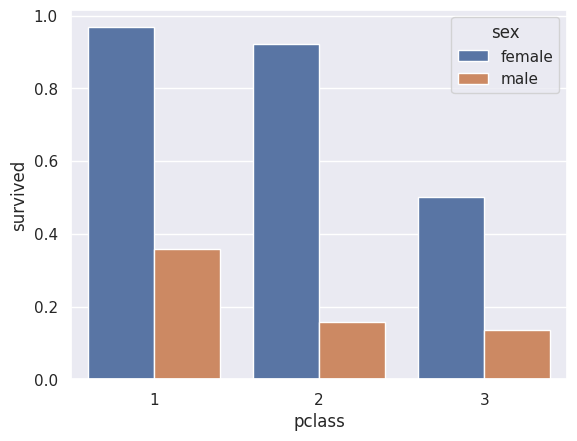

In [ ]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, errorbar=None);

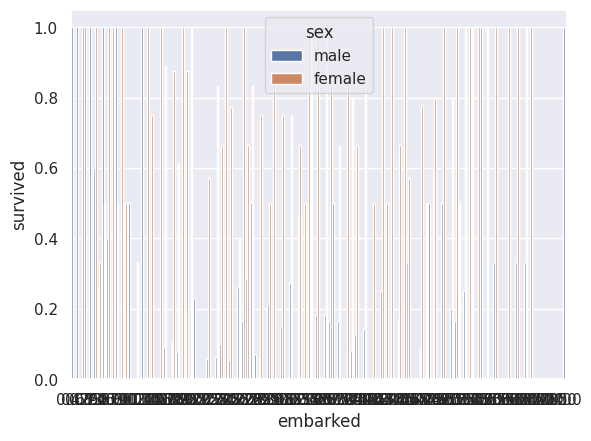

In [ ]:
sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, errorbar=None);

# Comparison between Male & Female

In [ ]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

In [ ]:
female_df.survived.value_counts(normalize=True)

1    0.741214
0    0.258786
Name: survived, dtype: float64

In [ ]:
female_df.groupby('pclass').survived.mean()

pclass
1    0.967742
2    0.921053
3    0.500000
Name: survived, dtype: float64

In [ ]:
type(female_df.groupby('pclass').survived.mean())  # Pandas Series

pandas.core.series.Series

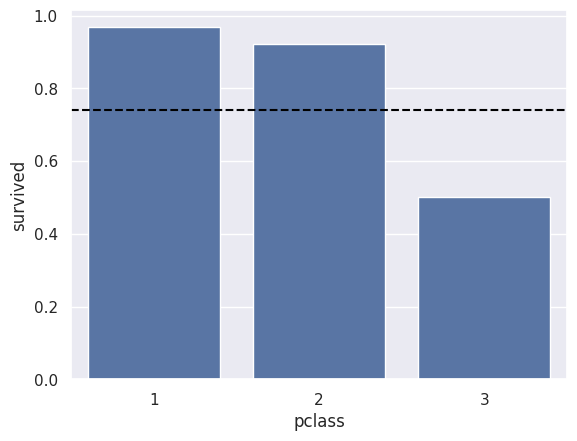

In [ ]:
sns.barplot(x='pclass', y='survived', data=female_df, errorbar=None);
plt.axhline(female_df.survived.mean(), color='black', linestyle='--')
plt.show()

In [ ]:
male_df.survived.value_counts(normalize=True)

0    0.813913
1    0.186087
Name: survived, dtype: float64

In [ ]:
male_df.groupby('pclass').survived.mean()

pclass
1    0.358333
2    0.157407
3    0.135447
Name: survived, dtype: float64

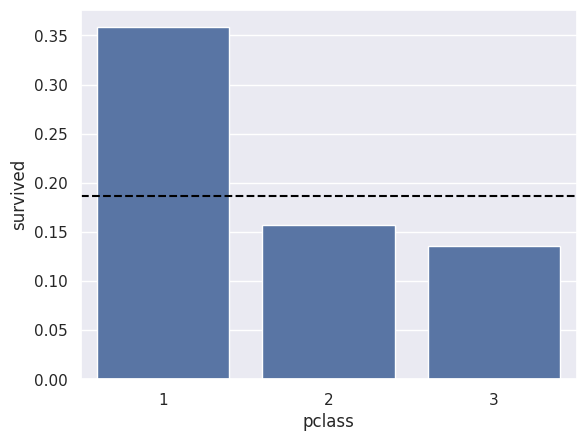

In [ ]:
sns.barplot(x='pclass', y='survived', data=male_df, errorbar=None);
plt.axhline(male_df.survived.mean(), color='black', linestyle='--')

In [ ]:
sex_class = pd.merge(female_df.groupby('pclass').survived.mean(), male_df.groupby('pclass').survived.mean(), on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.967742,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
sex_class.rename(columns= {'survived_x': 'female_survived', 'survived_y': 'male_survived'}, inplace=True)

In [ ]:
sex_class

,female_survived,male_survived
pclass,,
1,0.967742,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
df.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.967742
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

#  Combine (parch) & (sibsp) to (family_size)

In [ ]:
df['family_size']=df['parch']+df['sibsp']+1

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_group,fare_group,family_size
7,0,3,male,2.0,3,1,21.075,2.0,child,high,5


count    888.000000
mean       1.906532
std        1.615609
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: family_size, dtype: float64


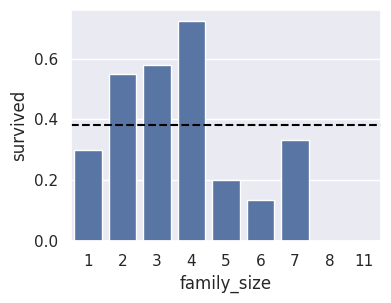

In [ ]:
print(df['family_size'].describe())
plt.figure(figsize=(4,3))
sns.barplot(data=df , y='survived' , x='family_size',errorbar=None);
plt.axhline(df.survived.mean(), color='black', linestyle='--');
plt.show()

In [ ]:
print(f"Survival Rate : { round(df.groupby('family_size')['survived'].mean()*100,2)}")

Survival Rate : family_size
1     30.09
2     55.00
3     57.84
4     72.41
5     20.00
6     13.64
7     33.33
8      0.00
11     0.00
Name: survived, dtype: float64


In [ ]:
print("The top 3 categories in the survival Rate : ")
round(df.groupby('family_size')['survived'].mean()*100 , 2).sort_values(ascending=False).head(3)

The top 3 categories in the survival Rate : 


family_size
4    72.41
3    57.84
2    55.00
Name: survived, dtype: float64

In [ ]:
len(df[df['family_size'] == 1])

535

*   535 passengers were alone



In [ ]:
print("The Survival Rate for alone passengers:")
round(df[df['family_size'] == 1]['survived'].mean() * 100, 2)

The Survival Rate for alone passengers:


30.09

# Age Groups

In [ ]:
df['age_groups']= pd.cut(df.age , bins = [0,22,27,37,82], labels=['child', 'young', 'adult', 'senior'])

In [ ]:
# Group by 'sex' and 'age_groups' and calculate the mean survival rate
age_group_survival = df.groupby(['sex', 'age_groups'])['survived'].mean()

In [ ]:
lowest_survival = age_group_survival.idxmin()
highest_survival = age_group_survival.idxmax()

print("Age group with the lowest survival rate for {} : {}".format(lowest_survival[0], lowest_survival[1]))
print("Age group with the highest survival rate for {}: {}".format(highest_survival[0], highest_survival[1]))

Age group with the lowest survival rate for male : young
Age group with the highest survival rate for female: adult


# Conclusion

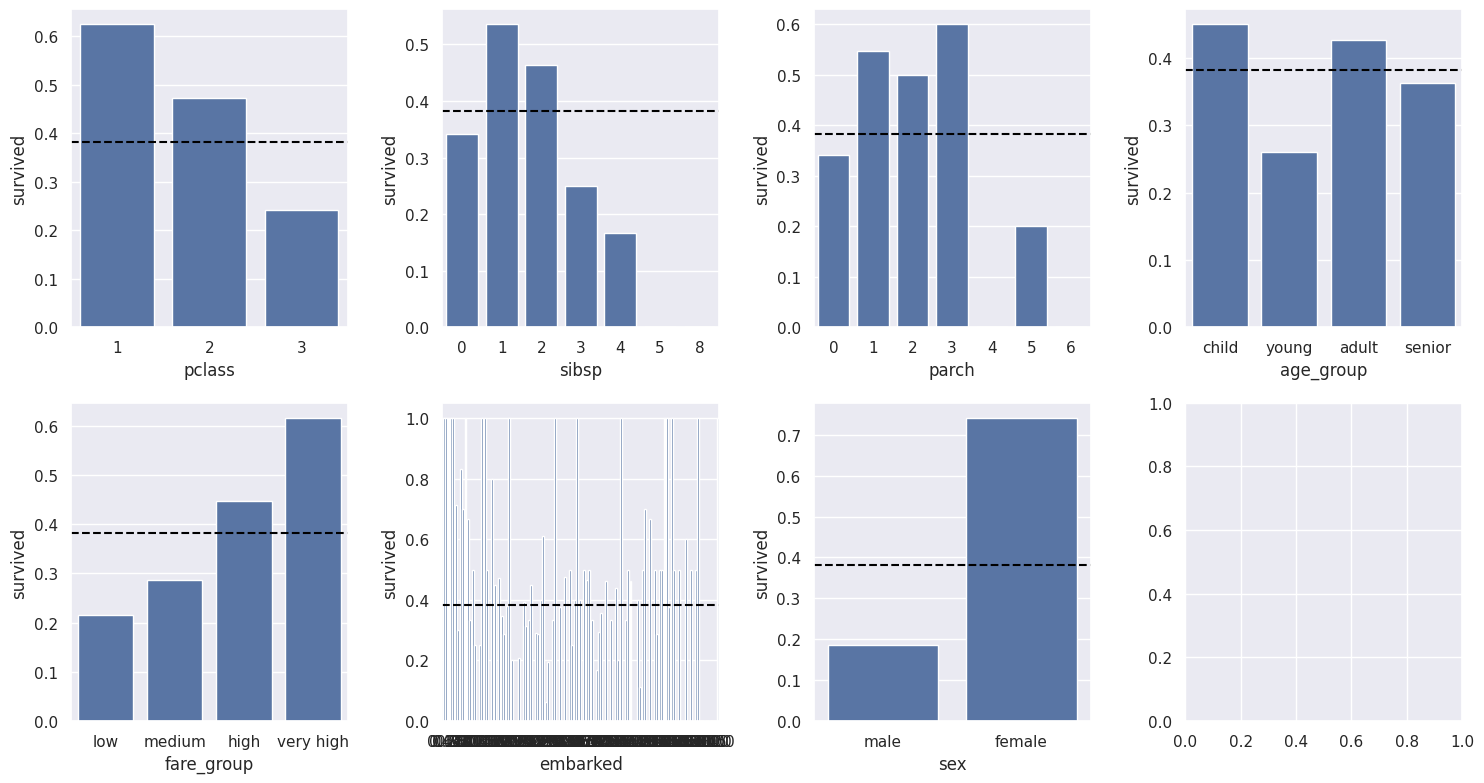

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, errorbar=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()

* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* Females had a higher survival rate
* The lowest survival rate for young males
* the highest survival rate for adult females